## 2-Visualize MFR

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Import Data

Import the MFR Data:

```python
import numpy as np
import pandas as pd
url = 'http://apmonitor.com/pds/uploads/Main/polymer_reactor.txt'
data = pd.read_csv(url)
data.columns = ['Time','C3=','H2R','Pressure','Level','C2=','Cat','Temp','MFR']
data['lnMFR'] = np.log(data['MFR'].values)
del data['Time']
data = data.dropna() # drop any row with NaN
data.head(10)
```

Run this code to import the data as a DataFrame.

In [10]:
import numpy as np
import pandas as pd
url = 'http://apmonitor.com/pds/uploads/Main/polymer_reactor.txt'
data = pd.read_csv(url)
data.columns = ['Time','C3=','H2R','Pressure','Level','C2=','Cat','Temp','MFR']
data['lnMFR'] = np.log(data['MFR'].values)
del data['Time']
data = data.dropna().reset_index(drop=True) # drop any row with NaN
data.head(10)

,C3=,H2R,Pressure,Level,C2=,Cat,Temp,MFR,lnMFR
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4,1.223775
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2,1.163151
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2,1.163151
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1,1.131402
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3,1.193922
5,25362.809,0.150,30.438940,78.293411,32548.566,0.140550,79.061462,3.2,1.163151
6,25642.936,0.150,30.419355,78.568573,42557.902,0.166875,79.565430,3.4,1.223775
7,27009.320,0.150,30.504484,78.852005,45878.480,0.160510,79.390396,3.6,1.280934
8,27307.461,0.150,30.204451,78.931427,49528.848,0.159013,78.511749,3.8,1.335001
9,26623.619,0.150,30.201500,78.574249,43206.711,0.141628,78.461151,3.8,1.335001


![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Pair Plot

A pair plot shows the correlation between variables.

```python
sns.pairplot(data)
```

It has bar distributions on the diagonal and scatter plots on the off-diagonal. A pair plot also shows a different color (`hue`) by category `w`. Pair plots show correlations between pairs of variables that may be related and gives a good indication of features (explanatory inputs) that are used for classification or regression.

In [15]:
dpair = data.copy()
dpair['grade'] = np.where(dpair['lnMFR'].values<2,'Lo','Hi')
dpair.sample(5)

,C3=,H2R,Pressure,Level,C2=,Cat,Temp,MFR,lnMFR,grade
1500,24444.965,0.196,30.563303,77.260277,42996.441,0.150378,79.949631,3.3,1.193922,Lo
1494,25904.730,0.196,30.520048,76.614891,40780.699,0.136679,79.767944,3.7,1.308333,Lo
754,27987.258,0.190,31.578550,76.504311,13703.827,0.193194,81.338692,8.0,2.079442,Hi
2412,25177.629,0.178,30.850187,76.935020,27073.168,0.111649,80.661552,13.4,2.595255,Hi
2058,22684.092,0.174,31.222794,76.836174,40380.230,0.104811,79.590164,13.2,2.580217,Hi


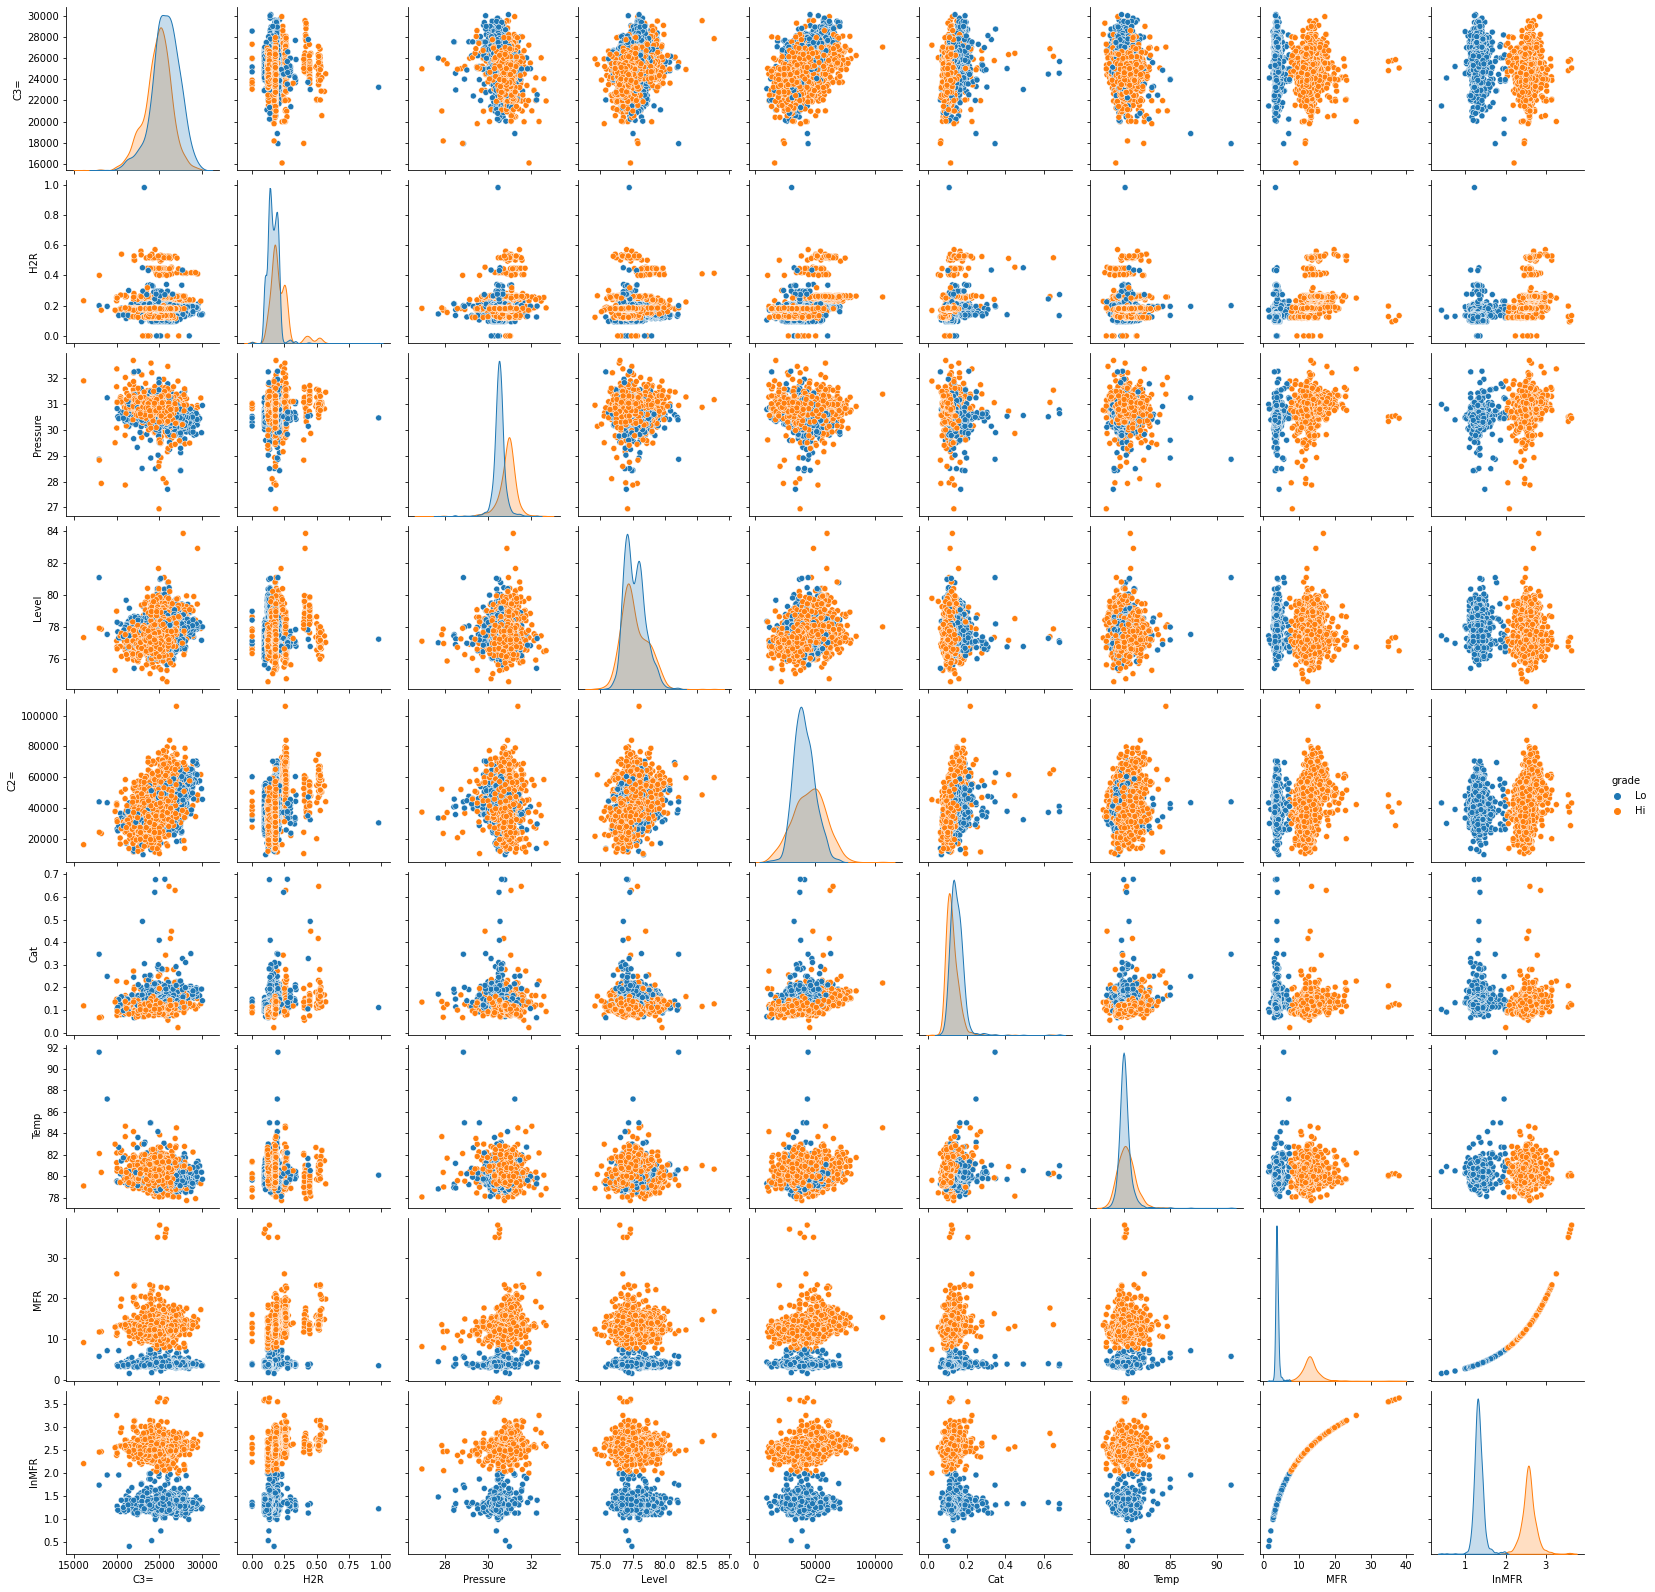

In [16]:
sns.pairplot(dpair,hue='grade')

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Joint Plot

A joint plot shows two variables, with the univariate and joint distributions.

```python
sns.jointplot(x='H2R',y='lnMFR',data=data,kind="kde")
```

Try `kind='reg'`, `'kde'`, and `'hex'` to see different joint plot styles.

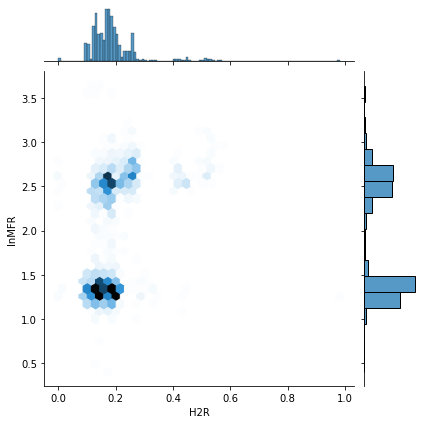

In [17]:
sns.jointplot(x='H2R',y='lnMFR',data=data,kind="hex")

Try a count plot to show the number of binned samples of `lnMFR` such as with:

```python
sns.countplot(x=data['lnMFR'])
```

<AxesSubplot:xlabel='lnMFR', ylabel='count'>

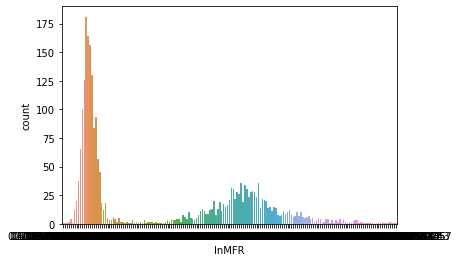

In [18]:
sns.countplot(x=data['lnMFR'])

Create a correlation heat map

```python
plt.figure(figsize=(10,8))
cor = data.corr()
sns.heatmap(cor, annot=True,cmap=plt.cm.Reds)
plt.show()
```

to examine the correlation among the variables. Which have the strongest correlation to `lnMFR`?

In [20]:
plt.figure(figsize=(10,8))
cor = data.corr()
cor

,C3=,H2R,Pressure,Level,C2=,Cat,Temp,MFR,lnMFR
C3=,1.000000,-0.035833,-0.246382,0.207590,0.387429,0.279968,-0.157591,-0.247984,-0.258358
H2R,-0.035833,1.000000,0.221576,0.104436,0.375745,0.226919,0.052967,0.426433,0.413058
Pressure,-0.246382,0.221576,1.000000,0.044294,0.064547,-0.152372,-0.036286,0.438837,0.448031
Level,0.207590,0.104436,0.044294,1.000000,0.289986,0.000157,-0.084688,-0.006452,0.003313
C2=,0.387429,0.375745,0.064547,0.289986,1.000000,0.246106,0.116090,0.233219,0.216502
Cat,0.279968,0.226919,-0.152372,0.000157,0.246106,1.000000,0.103214,-0.209013,-0.239157
Temp,-0.157591,0.052967,-0.036286,-0.084688,0.116090,0.103214,1.000000,0.125628,0.125574
MFR,-0.247984,0.426433,0.438837,-0.006452,0.233219,-0.209013,0.125628,1.000000,0.979901
lnMFR,-0.258358,0.413058,0.448031,0.003313,0.216502,-0.239157,0.125574,0.979901,1.000000


<Figure size 720x576 with 0 Axes>

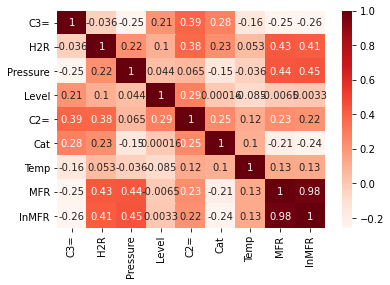

In [21]:
sns.heatmap(cor, annot=True,cmap=plt.cm.Reds)
plt.show()